In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':22})
%matplotlib inline
import numpy as np
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
%config InlineBackend.figure_format = 'retina'
import pandas as pd

# Set the font family to Cmr10
plt.rcParams['font.family'] = 'Cmr10'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Cmr10'
plt.rcParams['mathtext.it'] = 'Cmr10:italic'
plt.rcParams['mathtext.bf'] = 'Cmr10:bold'

plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False

from mpmath import *

In [2]:

def graph(angle_0):
    # Constants
    g = 9.81137 # Acceleration due to gravity
    L, W = 1.672, 0.01598 # Length and width of rod
    r_1, r_2 = 0.04701, 0.04701 # Radii of the cylinders
    P_1, P_2 = 0.338, 1.3324 # Positions of the knife edges
    m_1, x_1 = 1.261, L/2 # Mass of the rod and its centre of mass
    m_2, x_2 = 1.00256, 0.088 # Mass of the first cylinder and its centre of mass
    m_3, x_3 = 1.4048, 0.8 # Mass of the second cylinder and its centre of mass
    M = m_1 + m_2 + m_3 # Total mass
    C_of_M = (m_1 * x_1 + m_2 * x_2 + m_3 * x_3) / M # Centre of mass position
    l_1, l_2 = C_of_M - P_1, P_2 - C_of_M # Distances from pivot to centre of mass
    R_1 = C_of_M - x_1 # Distances between centre of mass and the centres of mass of the the rod and two cylinders
    R_2 = C_of_M - x_2 
    R_3 = C_of_M - x_3 
    I_c = 1/12 * m_1 * (L**2 + W**2) + m_1 * R_1**2 + 1/2 * m_2 * r_1**2 + m_2 * R_2**2 + 1/2 * m_3 * r_2**2 + m_3 * R_3**2 # Inertia about the centre of mass

    angle = float(angle_0 * pi / 180) # Initial angle in radians
    k = float(sin(angle/2)) # Elliptic modulus
    constant = sqrt((I_c + M * l_1 ** 2) / (M * g * l_1)) # From the formula for T
    T = 4 * constant * ellipk(k) # Time Period

    t = np.arange(0, 30, 0.1) # Time
    theta = np.zeros(300) # Angle

    for i in range(len(t)):
        theta[i] = angle

        u = t[i] * sqrt(constant ** -1)

        cd = ellipfun('cd', u, k)

        angle = re(2 * asin(k * cd))
    
    return t, theta

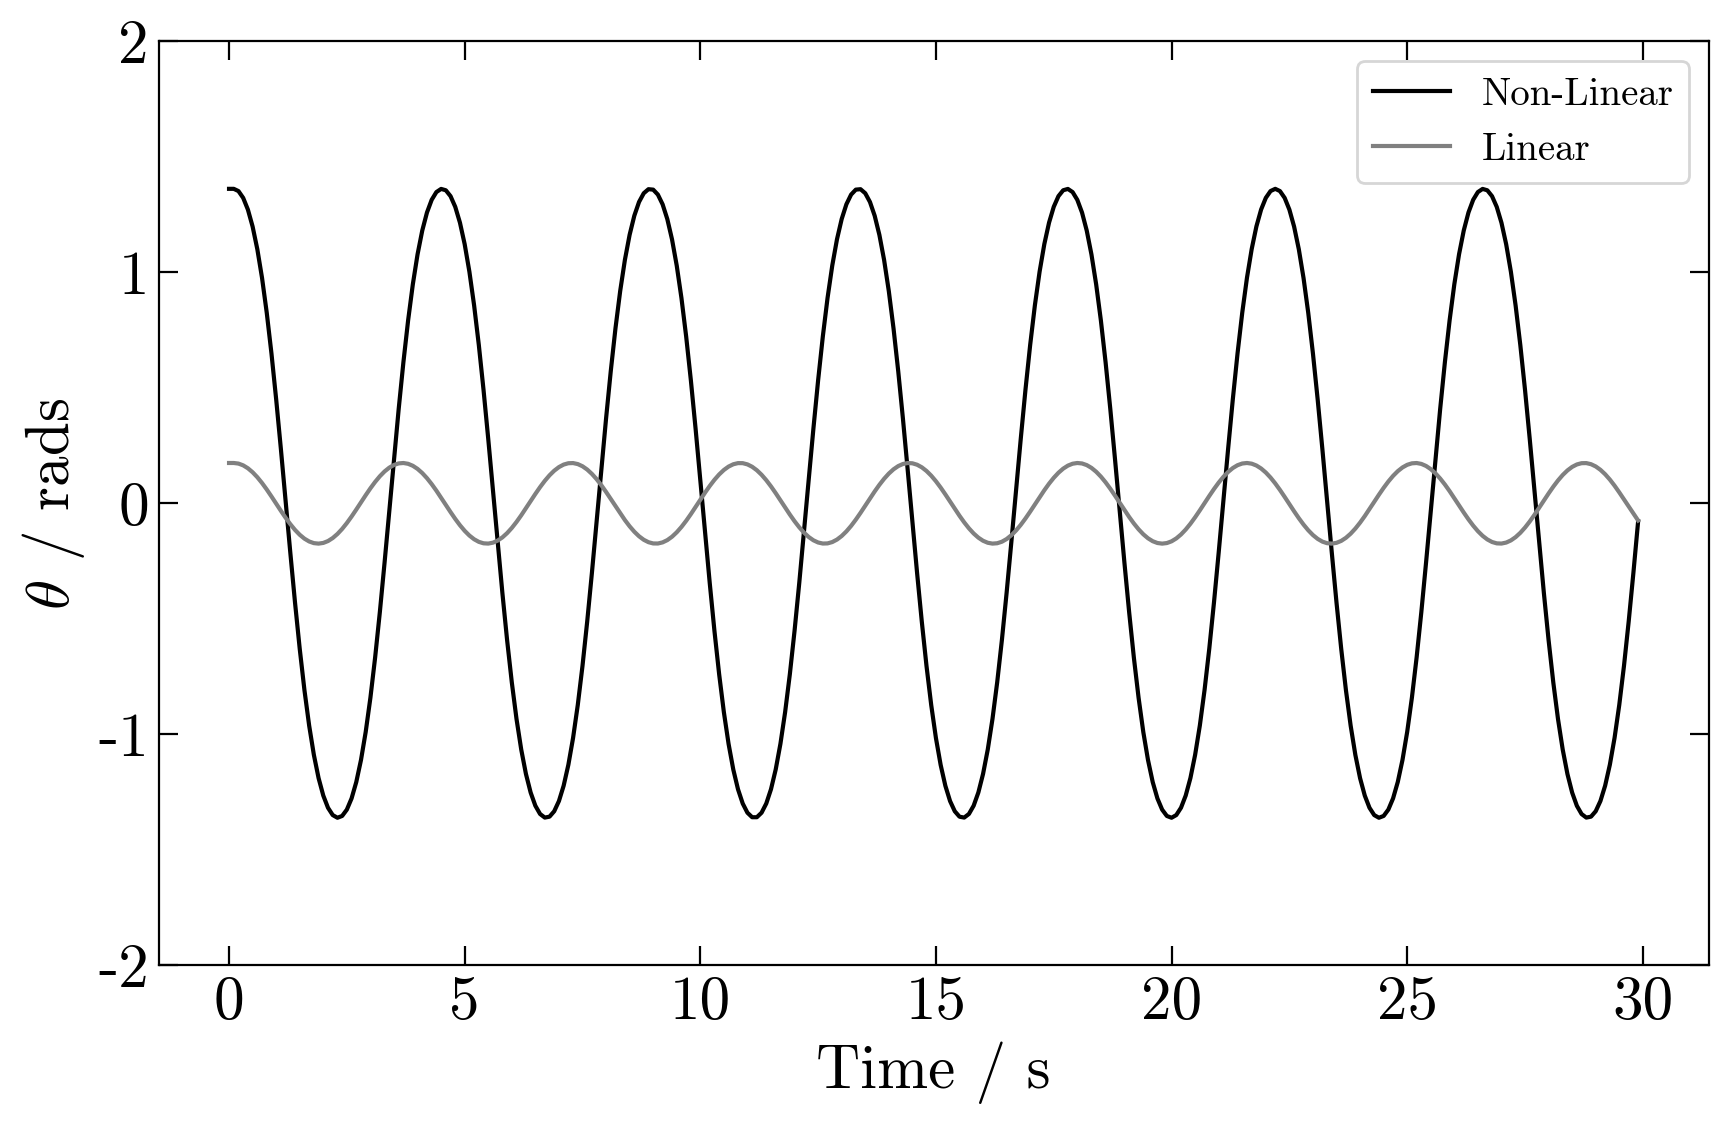

In [3]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

t1, theta1 = graph(78) # Large angle
t2, theta2 = graph(10) # Small angle

plt.plot(t1, theta1, color = 'black', label = 'Non-Linear')
plt.plot(t2, theta2, color = 'grey', label = 'Linear')

plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False

plt.legend(fontsize = 14)
plt.xlabel('Time / s')
plt.ylabel(r'$\theta$ / rads')
plt.ylim(-2, 2)

plt.tick_params(direction='in',
                length=7,
                bottom='on',
                left='on',
                top='on',
                right='on',
               )
plt.margins()

plt.show()

In [4]:
fig.savefig('figures/NLPModel.png', dpi=300)

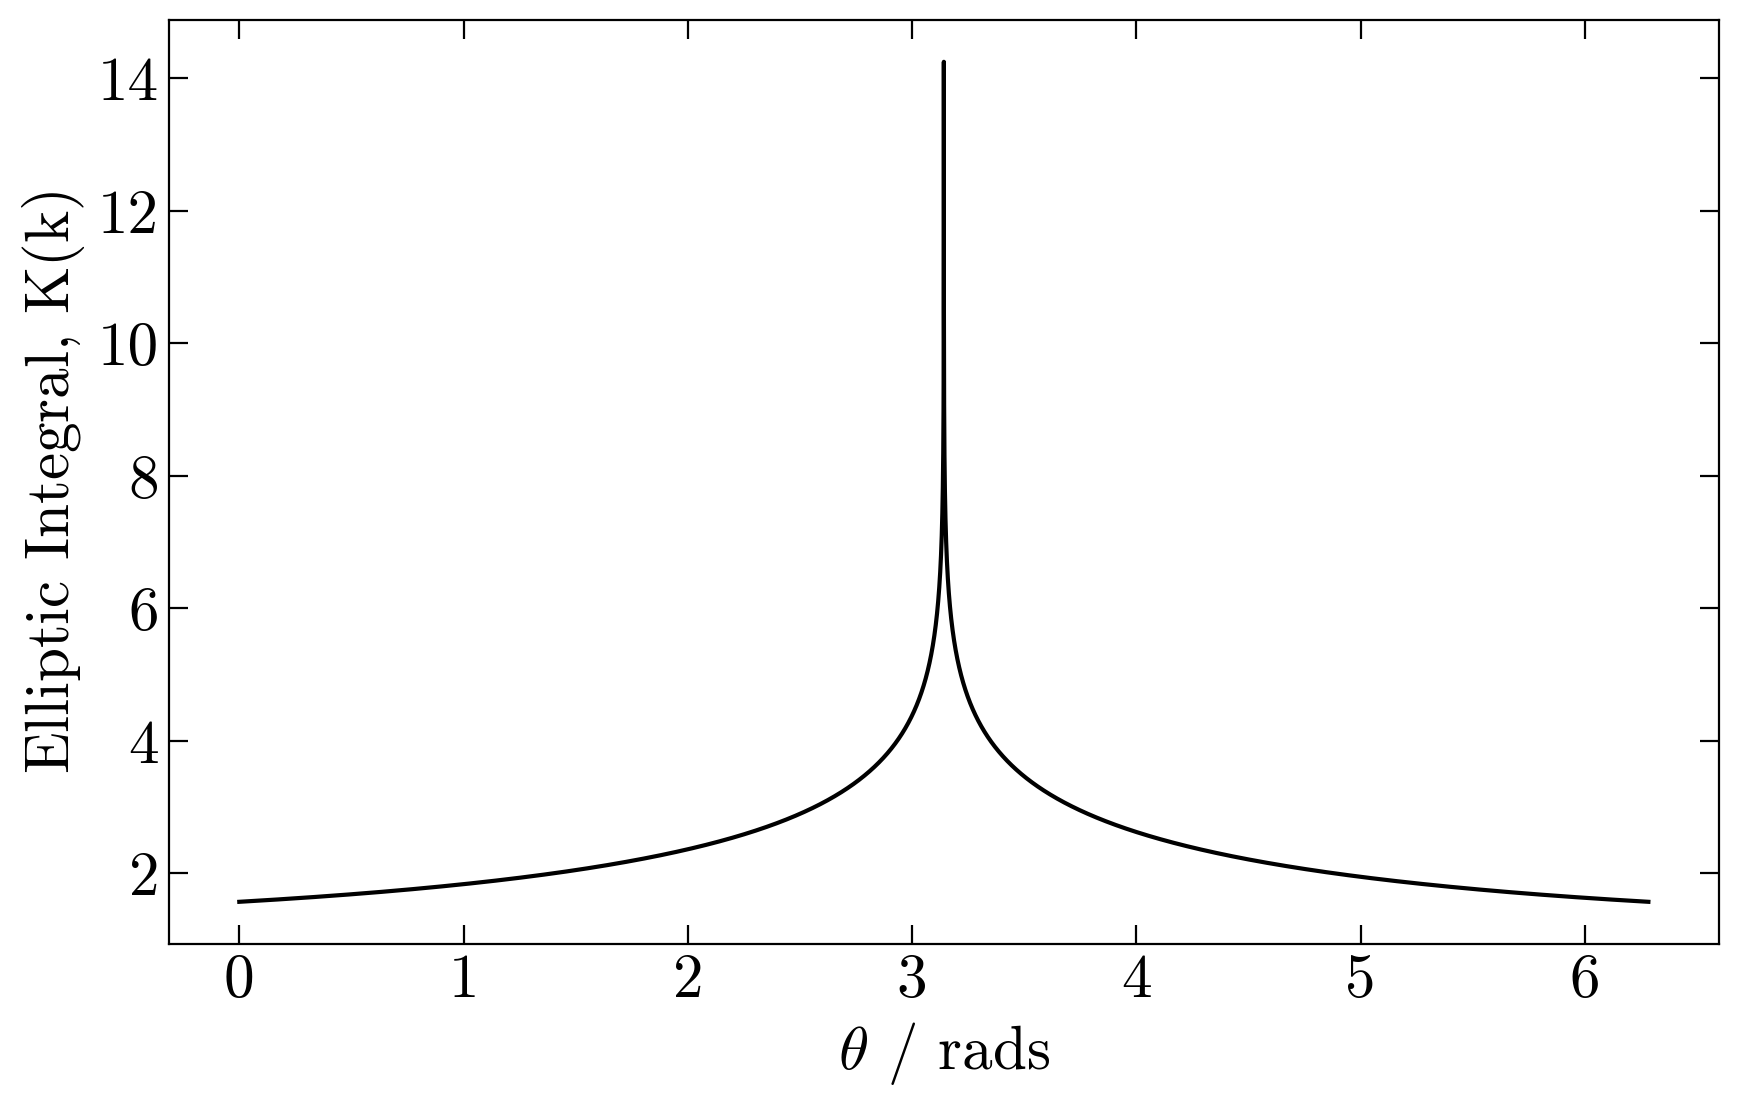

In [5]:
theta = np.arange(0, 2 * np.pi, 0.0001)
k = np.sin(theta/2)
K_integral = np.zeros(len(theta))

for i in range(len(theta)):
    K_integral[i] = ellipk(k[i])

fig = plt.figure(figsize=(10,6))

plt.plot(theta, K_integral, color = 'black')

plt.xlabel(r'$\theta$ / rads')
plt.ylabel(r'Elliptic Integral, $K(k)$')

plt.tick_params(direction='in',
                length=7,
                bottom='on',
                left='on',
                top='on',
                right='on',
               )
plt.margins()

plt.show()

In [6]:
fig.savefig('figures/Elliptic.png', dpi=300)

In [7]:
g = 9.81137 # Acceleration due to gravity

L, W = 1.672, 0.01598 # Length and width of rod
r_1, r_2 = 0.04701, 0.04701 # Radii of the cylinders
P_1, P_2 = 0.338, 1.3324 # Positions of the knife edges

m_1, x_1 = 1.261, L/2 # Mass of the rod and its centre of mass
m_2, x_2 = 1.00256, 0.088 # Mass of the first disk and its centre of mass
m_3, x_3 = 1.4048, np.arange(0.55, 1.12, 0.00005) # Mass of the second disk and its centres of mass as it is moved

M = m_1 + m_2 + m_3 # Total mass

C_of_M = (m_1 * x_1 + m_2 * x_2 + m_3 * x_3) / M # Array of the centres of mass


l_1, l_2 = C_of_M - P_1, P_2 - C_of_M # Array of the distances between the centres of mass and the knife edges

R_1 = C_of_M - x_1 # Array of the distances between the centres of mass and the centre of mass of the rod
R_2 = C_of_M - x_2 # Array of the distances between the centres of mass and the centre of mass of the first disk
R_3 = C_of_M - x_3 # Array of the distances between the centres of mass and the centre of mass of the second disk

I_c = 1/12 * m_1 * (L**2 + W**2) + m_1 * R_1**2 + 1/2 * m_2 * r_1**2 + m_2 * R_2**2 + 1/2 * m_3 * r_2**2 + m_3 * R_3**2 # Inertia about the centre of mass

angle = float(27 * pi / 180)
k = float(sin(angle/2))
K = ellipk(k)
T1 = 4 * np.sqrt((I_c + M * l_1**2) / (M * g * l_1)) * K
T2 = 4 * np.sqrt((I_c + M * l_2**2) / (M * g * l_2)) * K


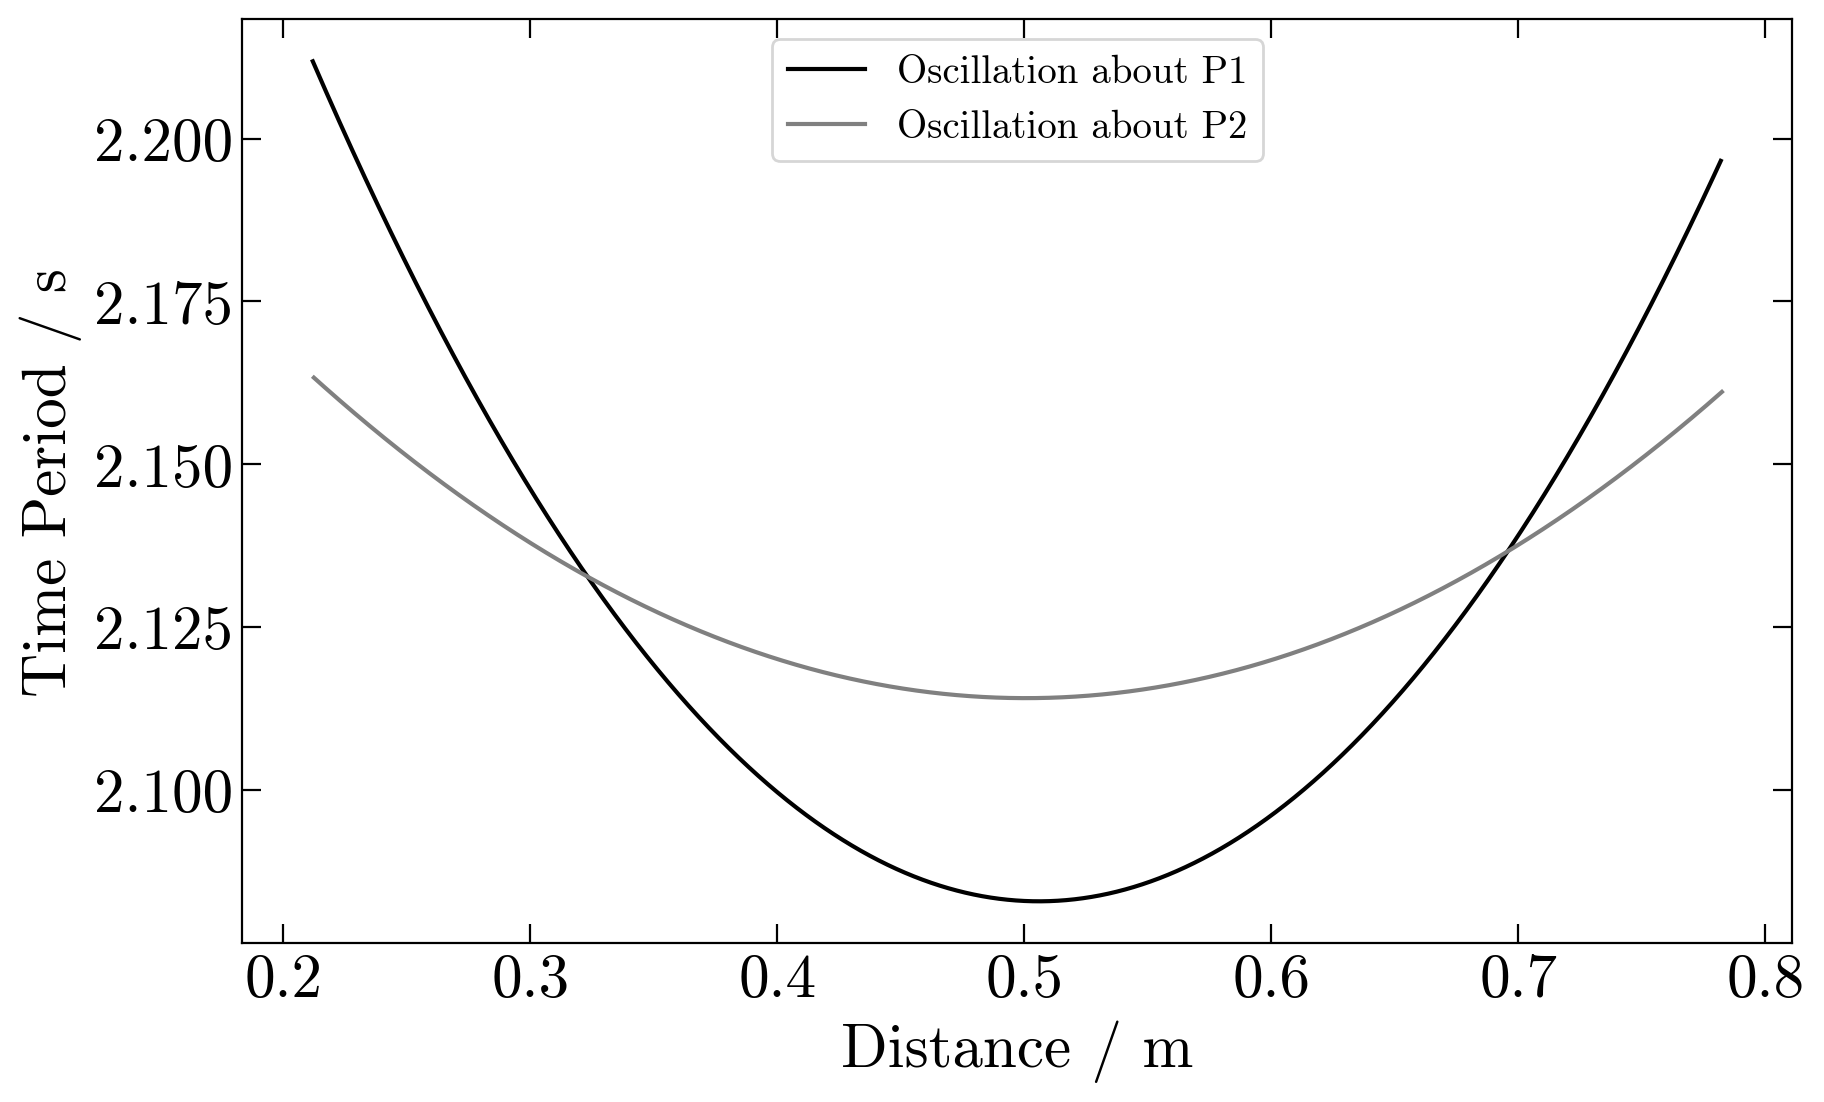

In [8]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111)

L1 = x_3 - P_1
L2 = P_2 - x_3

def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

popt, pcov = curve_fit(quadratic, L1, T1)
a = popt[0]
b = popt[1]
c = popt[2]
err_a = np.sqrt(float(pcov[0][0]))
err_b = np.sqrt(float(pcov[1][1]))
err_c = np.sqrt(float(pcov[2][2]))

plt.plot(L1, quadratic(L1, a, b, c), color='black', label='Oscillation about P1')

popt, pcov = curve_fit(quadratic, L2, T2)
x = popt[0]
y = popt[1]
z = popt[2]
err_x = np.sqrt(float(pcov[0][0]))
err_y = np.sqrt(float(pcov[1][1]))
err_z = np.sqrt(float(pcov[2][2]))

plt.plot(L2, quadratic(L2, x, y, z), color='grey', label='Oscillation about P2')

plt.tick_params(direction='in',
                length=7,
                bottom='on',
                left='on',
                top='on',
                right='on',
               )

plt.legend(fontsize = 14, loc='upper center') 
plt.xlabel('Distance / m')
plt.ylabel('Time Period / s')

plt.show()

In [9]:
x1 = (y-b + np.sqrt((b-y)**2 - 4*(a-x)*(c-z))) / (2*(a-x))
y1 = quadratic(x1, a, b, c)

x2 = (y-b - np.sqrt((b-y)**2 - 4*(a-x)*(c-z))) / (2*(a-x))
y2 = quadratic(x2, a, b, c)
      
print(f'({x1}, {y1})')
print(f'({x2}, {y2})')

T = y1

k = float(sin(27 * pi / 360))

g = 16 * 0.996 * ellipk(k)**2 / T**2

print(g)

(0.6956771224262515, 2.136623862695335)
(0.323203219464239, 2.1327528192612895)
9.81595634298412


In [10]:
fig.savefig('figures/NLPtimeper', dpi=300)